This file is for evaluating meteostat data 

In [2]:
from meteostat import Point, Hourly
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# 4 random points in NYC
p0 = Point(40.76678085327149, -73.9214782714843) # 30 Av (N,W) Queens
p1 = Point(40.68962860107422, -73.9222717285156) # Gates Av (J,Z) Brooklyn
p2 = Point(40.63506317138672, -74.01171875) #8 Av (N) Brooklyn
p3 = Point(40.83648681640625, -73.8470382690429) # Zerega Av (6) Bronx
p4 = Point(40.7789, -73.9692) # Central park USW00094728 station

# 1.5 yrs worth of data
start =  pd.to_datetime('2021-01-01')
end = pd.to_datetime('2024-05-28')

df = pd.DataFrame()

for i, point in enumerate([p0, p1, p2, p3, p4]):
    data = Hourly(point, start, end)
    new_df = data.fetch()
    new_df['location_index'] = i
    df = pd.concat([df, new_df])
    print(df.shape)

(29833, 12)
(59666, 12)


(89499, 12)
(119332, 12)
(149165, 12)


In [63]:
df.reset_index(inplace=True)

# Data Exploration and Evaluation

In [64]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
0,2021-01-01 00:00:00,4.0,-4.0,56.0,NaN,NaN,330.0,20.5,NaN,1026.3,NaN,4.0,0
1,2021-01-01 01:00:00,3.0,-4.0,60.0,0.0,NaN,0.0,0.0,NaN,1027.7,NaN,4.0,0
2,2021-01-01 02:00:00,3.0,-4.0,60.0,0.0,NaN,340.0,5.4,NaN,1028.1,NaN,4.0,0
3,2021-01-01 03:00:00,2.0,-3.9,65.0,0.0,NaN,270.0,9.4,NaN,1029.2,NaN,3.0,0
4,2021-01-01 04:00:00,2.0,-5.0,60.0,0.0,NaN,340.0,5.4,NaN,1029.9,NaN,3.0,0


In [65]:
# Outputs # rows
print("Number of rows:", df.shape[0])
# Outputs # cols
print("Number of cols:", df.shape[1])

Number of rows: 149165
Number of cols: 13


In [66]:
df.dtypes

time              datetime64[ns]
temp                     float64
dwpt                     float64
rhum                     float64
prcp                     float64
snow                     float64
wdir                     float64
wspd                     float64
wpgt                     float64
pres                     float64
tsun                     float64
coco                     float64
location_index             int64
dtype: object

In [67]:
df['coco'] = df['coco'].astype('category')
category_columns = df.select_dtypes(['category']).columns

In [68]:
# Find duplicate rows
print("Number of duplicate rows:", df[df.duplicated()==True].shape[0])

Number of duplicate rows: 0


In [69]:
# Check for null values in each column
print(df.isnull().sum())

time                   0
temp                   0
dwpt                   0
rhum                   0
prcp                   7
snow              149165
wdir                   0
wspd                   0
wpgt              149165
pres                   0
tsun              149165
coco                1160
location_index         0
dtype: int64


In [70]:
# Numeric
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns

In [71]:
# Get cardinality of the numeric columns
numeric_columns_card = df[numeric_columns].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
time,29833
temp,365
dwpt,500
rhum,95
prcp,142
snow,0
wdir,361
wspd,145
wpgt,0
pres,546


In [72]:
# First describe the numeric features
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,min,25%,50%,75%,max,std
time,149165,2022-09-14 12:00:00,2021-01-01 00:00:00,2021-11-07 18:00:00,2022-09-14 12:00:00,2023-07-22 06:00:00,2024-05-28 00:00:00,NaN
temp,149165.0,13.443058,-16.5,6.0,13.0,21.1,38.9,9.457338
dwpt,149165.0,5.211172,-26.5,-2.8,5.7,13.9,24.8,10.299115
rhum,149165.0,60.624905,6.0,46.0,60.0,76.0,100.0,19.651845
prcp,149158.0,0.152519,0.0,0.0,0.0,0.0,36.8,0.815773
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wdir,149165.0,186.254611,0.0,70.0,216.0,286.0,360.0,114.374615
wspd,149165.0,11.934188,0.0,7.0,11.0,16.2,68.4,7.533856
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,149165.0,1016.656889,982.1,1011.9,1016.5,1022.0,1041.0,7.785341


In [73]:
# Add % missing
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
time,0.000000
temp,0.000000
dwpt,0.000000
rhum,0.000000
prcp,0.004693
snow,100.000000
wdir,0.000000
wspd,0.000000
wpgt,100.000000
pres,0.000000


In [74]:
df[category_columns].nunique()

coco    22
dtype: int64

In [75]:
# Change category cols to remove 
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    # print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))

coco
 3.0     0.345852
 2.0     0.234921
 1.0     0.127128
 4.0     0.112915
 5.0     0.052097
 7.0     0.046780
 8.0     0.031978
 9.0     0.025482
NaN      0.007777
 14.0    0.006362
 17.0    0.002735
 15.0    0.001656
 12.0    0.001079
 16.0    0.000939
 13.0    0.000912
 18.0    0.000583
 10.0    0.000577
 11.0    0.000101
 25.0    0.000054
 19.0    0.000020
 20.0    0.000020
 27.0    0.000020
 21.0    0.000013
Name: proportion, dtype: float64


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'dwpt'}>],
       [<Axes: title={'center': 'rhum'}>,
        <Axes: title={'center': 'prcp'}>,
        <Axes: title={'center': 'snow'}>],
       [<Axes: title={'center': 'wdir'}>,
        <Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'wpgt'}>],
       [<Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'tsun'}>,
        <Axes: title={'center': 'location_index'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

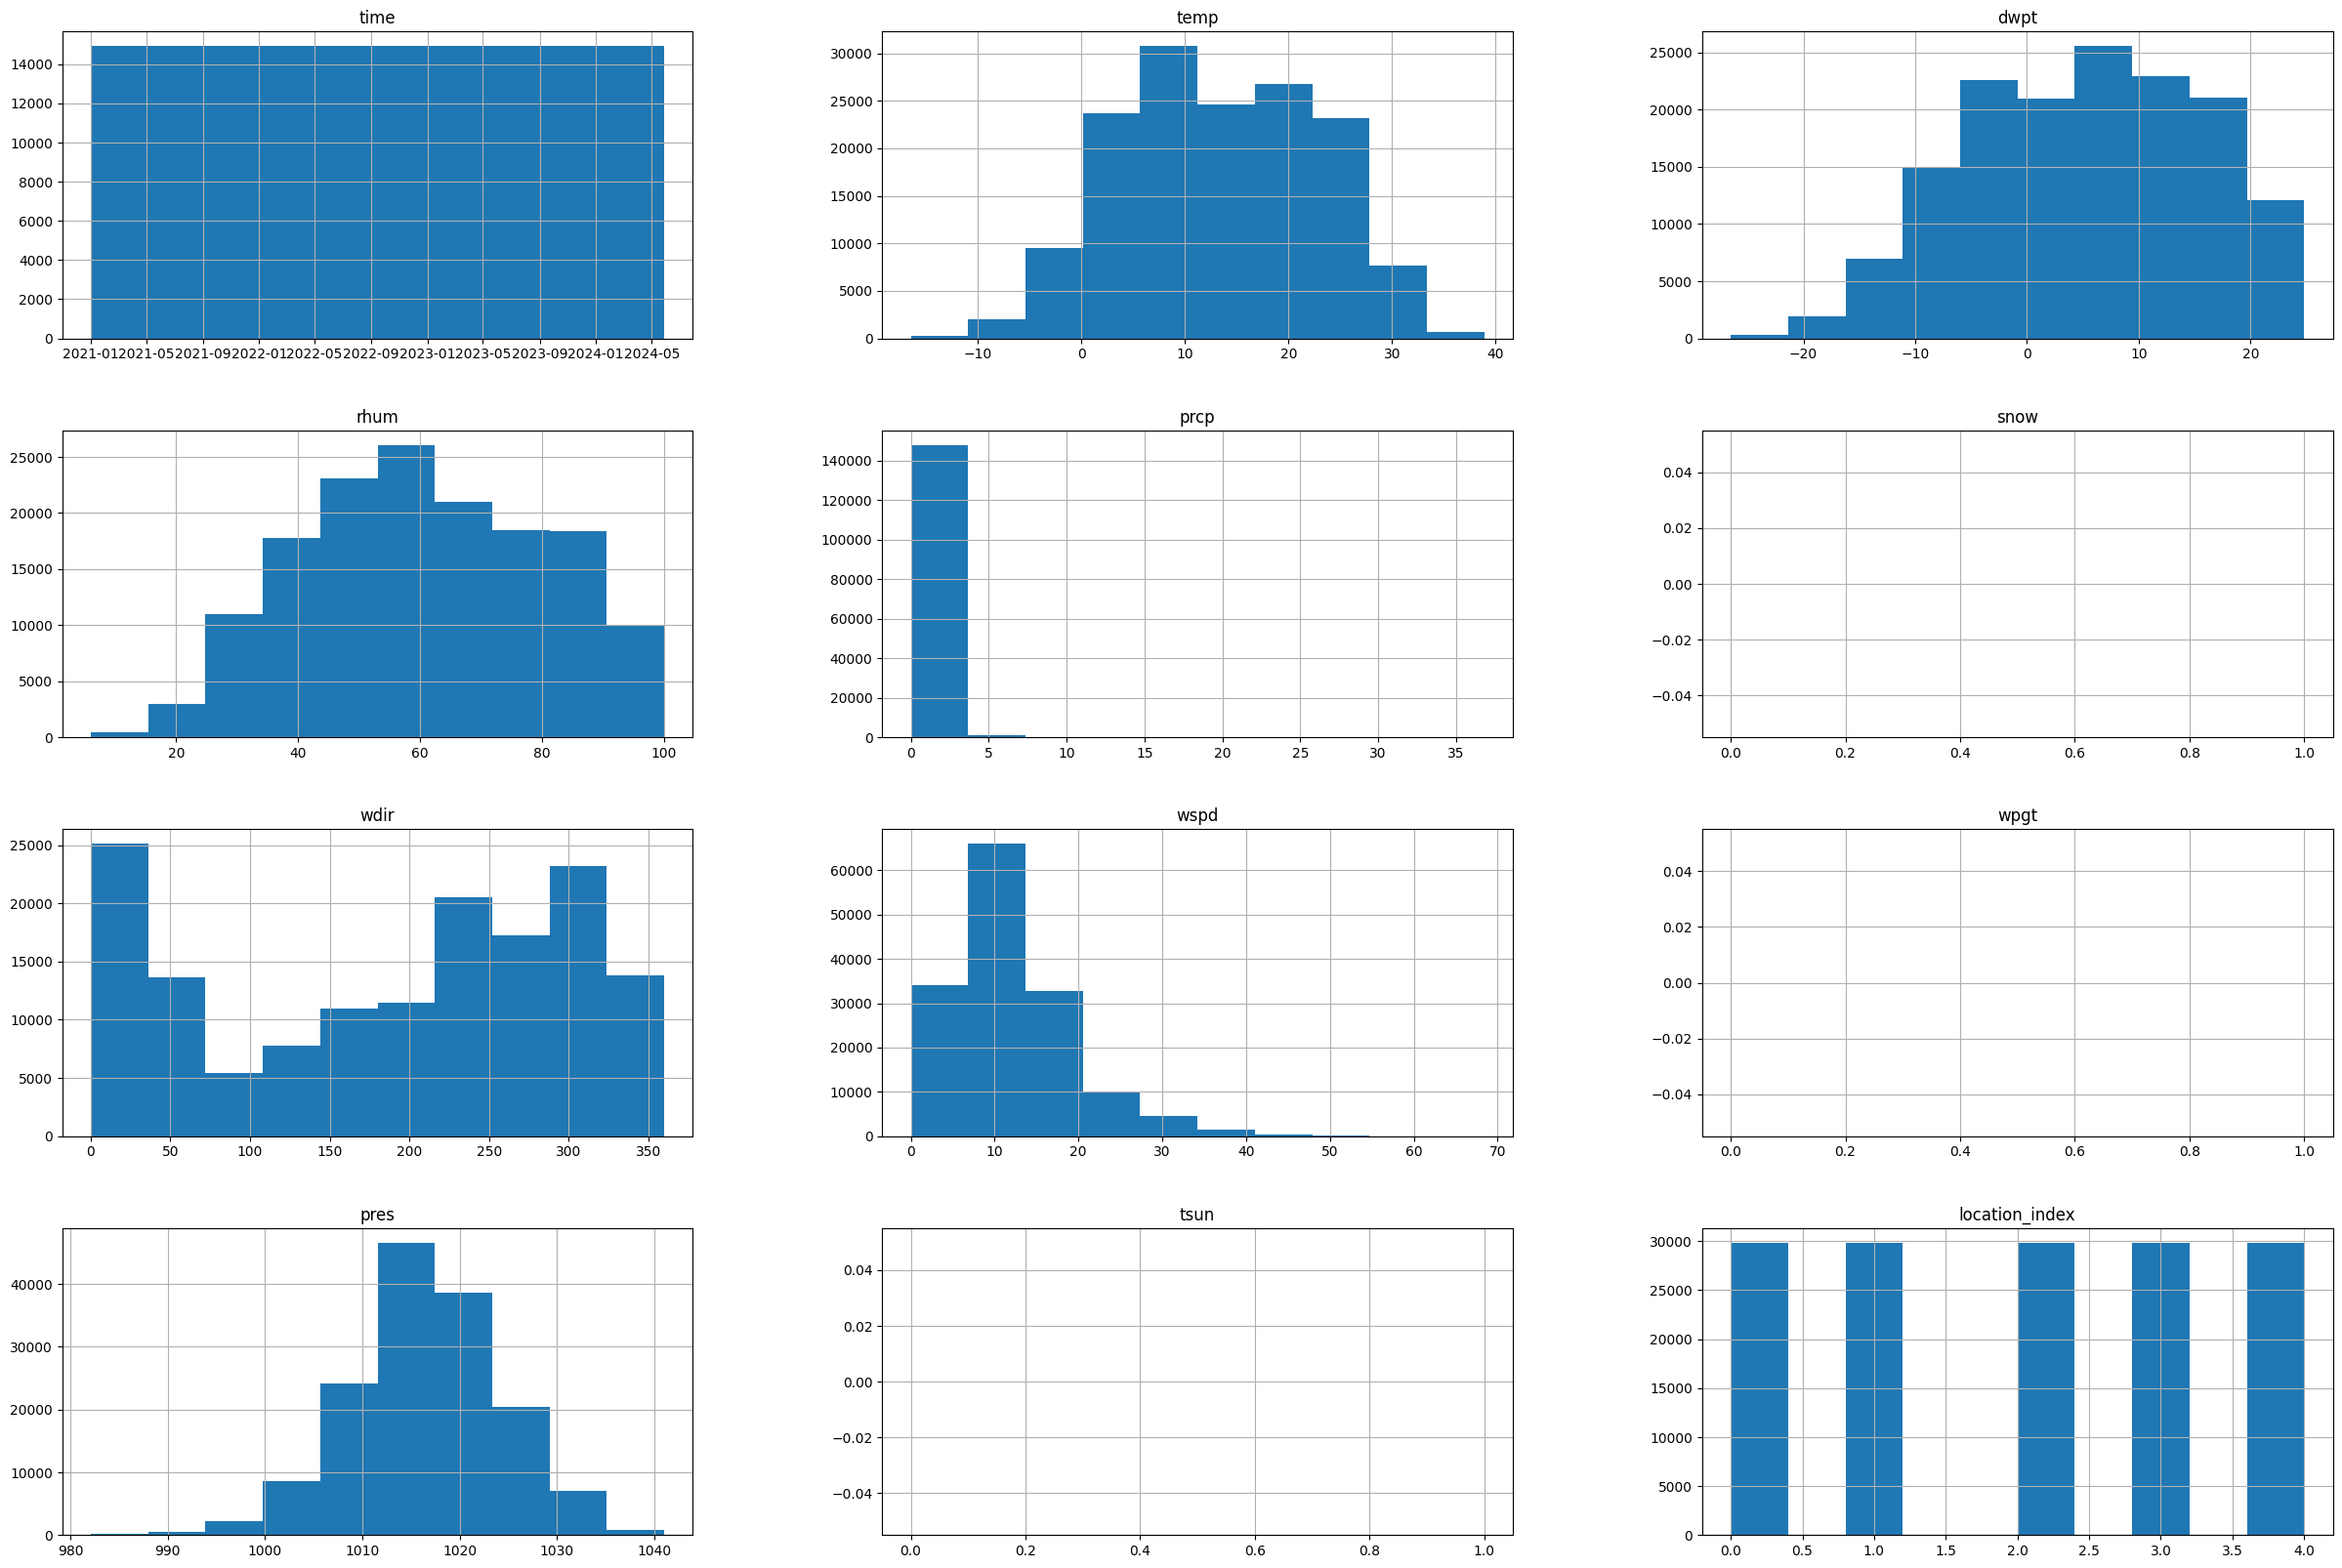

In [76]:
# Plot them all together instead
plt.figure()
df.hist(figsize=(30, 20))

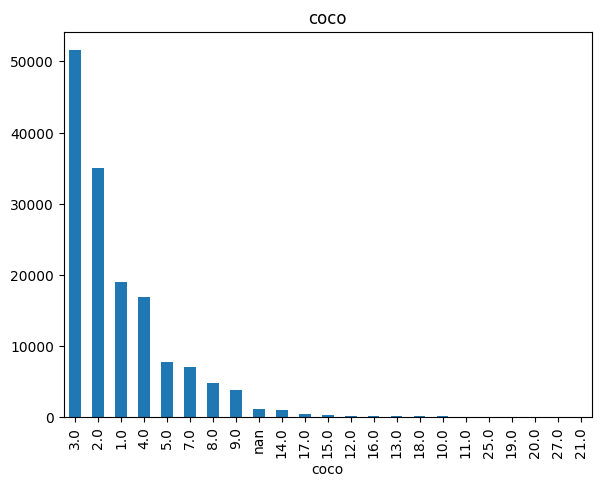

In [77]:
# Plot categoric columns
num_rows = (len(category_columns) + 1) // 2

# Create a single figure with subplots arranged in a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(category_columns):
    # Plot each bar plot on its corresponding subplot
    df[column].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

for j in range(len(category_columns), num_rows * 2):
    fig.delaxes(axes[j])

plt.show()

In [78]:
# Look once again at the summary stats table for categorical features
df_table_categoric = df[category_columns].describe().T
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
# cardinality
category_columns_card = df[category_columns].nunique()
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])

In [79]:
second_val = []
second_freq = []
for category in category_columns:
    # print(df[category].value_counts().index.tolist())
    second_val.append(df[category].value_counts().index.tolist()[1])
    second_freq.append(df[category].value_counts().iloc[1])

In [80]:
# Concatenate numeric, missing and cardinality cols
df_categoric_columns_data_quality_report_table = pd.concat([df_table_categoric, df_category_perc_missing, df_category_card], axis=1)

df_categoric_columns_data_quality_report_table['second'] = second_val
df_categoric_columns_data_quality_report_table['second_freq'] = second_freq

df_categoric_columns_data_quality_report_table = df_categoric_columns_data_quality_report_table[['count', 'unique', 'top', 'freq', 'second', 'second_freq', '%missing', 'card']]
# Print data quality report table for numeric features to a file.
df_categoric_columns_data_quality_report_table.to_csv("Meteostat-DataQualityReport-CategoricFeatures-Table.csv", 
                                         index_label='Feature')
df_categoric_columns_data_quality_report_table

,count,unique,top,freq,second,second_freq,%missing,card
coco,148005.0,22.0,3.0,51589.0,2.0,35042,0.777662,22


In [81]:
# Concatenate numeric, missing and cardinality cols
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("Meteostat-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
time,149165,2022-09-14 12:00:00,2021-01-01 00:00:00,2021-11-07 18:00:00,2022-09-14 12:00:00,2023-07-22 06:00:00,2024-05-28 00:00:00,NaN,0.000000,29833
temp,149165.0,13.443058,-16.5,6.0,13.0,21.1,38.9,9.457338,0.000000,365
dwpt,149165.0,5.211172,-26.5,-2.8,5.7,13.9,24.8,10.299115,0.000000,500
rhum,149165.0,60.624905,6.0,46.0,60.0,76.0,100.0,19.651845,0.000000,95
prcp,149158.0,0.152519,0.0,0.0,0.0,0.0,36.8,0.815773,0.004693,142
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0
wdir,149165.0,186.254611,0.0,70.0,216.0,286.0,360.0,114.374615,0.000000,361
wspd,149165.0,11.934188,0.0,7.0,11.0,16.2,68.4,7.533856,0.000000,145
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0
pres,149165.0,1016.656889,982.1,1011.9,1016.5,1022.0,1041.0,7.785341,0.000000,546


# Logical Integrity Tests

1. Timestamps not before Jan 2021 or after 28th May 2024.
2. 5 timestamps for every hour between 1st Jan 2023 and 28th May 2024 (12313 hours).
3. No temperature in central park in 2023 below NYC Central park min (-16.1) or above NYC central park max (+33.9 C).
4. Wind direction not below 0 or above 360
5. Relative humidity not below 0 or above 100%.
6. Weather condition code not outside of allowed values (1-27).

In [82]:
# Test 1

df[df['time']<start]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [83]:
df[df['time']> end]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [84]:
# Test 2
print(df.shape[0] == 29833*5)

True


In [85]:
# Test 3
df[df['temp']< -16.1]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
9490,2022-01-31 10:00:00,-16.5,-18.6,84.0,0.0,NaN,4.0,7.9,NaN,1024.7,NaN,3.0,0
98989,2022-01-31 10:00:00,-16.5,-18.6,84.0,0.0,NaN,4.0,7.9,NaN,1024.7,NaN,3.0,3
128822,2022-01-31 10:00:00,-16.5,-18.6,84.0,0.0,NaN,4.0,7.9,NaN,1024.7,NaN,3.0,4


In [86]:
df[(df['time'].dt.year == 2023) & (df['location_index']  == 4) & (df['temp']> 33.9)]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [87]:
df[ (df['location_index']  == 4) & (df['temp']> 33.9)].shape

(24, 13)

In [88]:
# Test 4
df[df['wdir']<0]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [89]:
df[df['wdir']>360]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


# Comparison with NOAA Central park data

In [90]:
noaa_start = start =  pd.to_datetime('2023-01-01')
noaa_end = pd.to_datetime('2023-06-01')
df_compare = df[(df['location_index'] == 4) & (df['time'] <= noaa_end) & (df['time']>= noaa_start)]

In [91]:
df_compare.shape

(3625, 13)

In [92]:
df_compare.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
136852,2023-01-01 00:00:00,10.0,9.4,96.0,1.1,NaN,30.0,6.0,NaN,1011.0,NaN,9.0,4
136853,2023-01-01 01:00:00,13.0,11.9,93.0,1.4,NaN,250.0,11.0,NaN,1010.0,NaN,9.0,4
136854,2023-01-01 02:00:00,12.0,11.5,97.0,0.5,NaN,223.0,10.4,NaN,1010.0,NaN,8.0,4
136855,2023-01-01 03:00:00,13.0,11.9,93.0,0.7,NaN,220.0,9.0,NaN,1009.0,NaN,8.0,4
136856,2023-01-01 04:00:00,12.2,11.1,93.0,1.3,NaN,0.0,0.0,NaN,1007.0,NaN,9.0,4


In [121]:
df_noaa = pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00094728_2023.psv", sep='|')
# La Guardia pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014732_2023.psv", sep='|')
# Central park pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00094728_2023.psv", sep='|')
# The Battery pd.read_csv("./hourly_data_2023/2023/GHCNh_USL000BATN6_2023.psv", sep='|')
# Port Auth pd.read_csv("./hourly_data_2023/2023/GHCNh_USI0000KJRB_2023.psv", sep='|')
# Newark pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014734_2023.psv", sep='|')

In [122]:
df_noaa['time'] = df_noaa.apply(lambda row: pd.to_datetime(f"{row['Year']}-{row['Month']}-{row['Day']} {row['Hour']}:{row['Minute']}"), axis=1)

In [123]:
df_noaa.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,...,sky_cover_baseht_3_Report_Type,sky_cover_baseht_3_Source_Code,sky_cover_baseht_3_Source_Station_ID,remarks,remarks_Measurement_Code,remarks_Quality_Code,remarks_Report_Type,remarks_Source_Code,remarks_Source_Station_ID,time
0,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,6,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET11812/31/22 19:06:03 SPECI KNYC 010006Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:06:00
1,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,18,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET10612/31/22 19:18:03 SPECI KNYC 010018Z 030...,NaN,F,NaN,343,725053-94728,2023-01-01 00:18:00
2,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,31,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET11112/31/22 19:31:03 SPECI KNYC 010031Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:31:00
3,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,44,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET10212/31/22 19:44:03 SPECI KNYC 010044Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:44:00
4,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,49,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET09712/31/22 19:49:03 SPECI KNYC 010049Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:49:00


In [124]:
df_noaa.columns.values

array(['Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Latitude', 'Longitude', 'Elevation', 'temperature',
       'temperature_Measurement_Code', 'temperature_Quality_Code',
       'temperature_Report_Type', 'temperature_Source_Code',
       'temperature_Source_Station_ID', 'dew_point_temperature',
       'dew_point_temperature_Measurement_Code',
       'dew_point_temperature_Quality_Code',
       'dew_point_temperature_Report_Type',
       'dew_point_temperature_Source_Code',
       'dew_point_temperature_Source_Station_ID',
       'station_level_pressure',
       'station_level_pressure_Measurement_Code',
       'station_level_pressure_Quality_Code',
       'station_level_pressure_Report_Type',
       'station_level_pressure_Source_Code',
       'station_level_pressure_Source_Station_ID', 'sea_level_pressure',
       'sea_level_pressure_Measurement_Code',
       'sea_level_pressure_Quality_Code',
       'sea_level_pressure_Report_Type', 'sea_level_pres

In [125]:
print(df_noaa.dtypes)

Station_ID                           object
Station_name                         object
Year                                  int64
Month                                 int64
Day                                   int64
                                  ...      
remarks_Quality_Code                 object
remarks_Report_Type                 float64
remarks_Source_Code                   int64
remarks_Source_Station_ID            object
time                         datetime64[ns]
Length: 191, dtype: object


In [126]:
df_noaa = df_noaa[['time', 'temperature', 'sea_level_pressure','station_level_pressure', 'wind_direction', 'wind_speed', 'precipitation','relative_humidity' ]]

In [127]:
df_noaa['wind_direction'].replace(999, 0, inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [128]:
df_joined = pd.merge_asof(df_compare, df_noaa, on='time', direction='nearest')

In [129]:
df_joined.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index,temperature,sea_level_pressure,station_level_pressure,wind_direction,wind_speed,precipitation,relative_humidity
0,2023-01-01 00:00:00,10.0,9.4,96.0,1.1,NaN,30.0,6.0,NaN,1011.0,NaN,9.0,4,10.0,NaN,1005.4,0.0,0.0,0.0,93
1,2023-01-01 01:00:00,13.0,11.9,93.0,1.4,NaN,250.0,11.0,NaN,1010.0,NaN,9.0,4,10.0,1009.8,1005.1,0.0,0.0,0.8,96
2,2023-01-01 02:00:00,12.0,11.5,97.0,0.5,NaN,223.0,10.4,NaN,1010.0,NaN,8.0,4,12.8,1008.6,1003.7,250.0,3.1,1.0,93
3,2023-01-01 03:00:00,13.0,11.9,93.0,0.7,NaN,220.0,9.0,NaN,1009.0,NaN,8.0,4,12.2,NaN,1003.4,230.0,2.6,0.5,97
4,2023-01-01 04:00:00,12.2,11.1,93.0,1.3,NaN,0.0,0.0,NaN,1007.0,NaN,9.0,4,12.2,NaN,1003.1,0.0,0.0,0.0,97


In [130]:
df_joined['temp_delta'] = df_joined['temp'] - df_joined['temperature']
df_joined['rhum_delta'] = df_joined['rhum'] - df_joined['relative_humidity']
df_joined['prcp_delta'] = df_joined['prcp'] - df_joined['precipitation']
df_joined['wdir_delta'] = abs(df_joined['wdir'] - df_joined['wind_direction'])
df_joined['wspd_delta'] = df_joined['wspd'] - df_joined['wind_speed']

In [131]:
df_joined.loc[df_joined['wdir_delta']>180, 'wdir_delta'] = 360 - df_joined['wdir_delta']

In [132]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp_delta,3625.0,-0.017462,0.938669,-6.7,-0.6,0.0,0.5,3.4
rhum_delta,3625.0,-0.073103,5.137020,-24.0,-3.0,0.0,2.0,39.0
prcp_delta,3500.0,0.038800,0.568239,-5.8,0.0,0.0,0.0,13.3
wdir_delta,3400.0,48.876471,50.255412,0.0,10.0,30.0,80.0,180.0
wspd_delta,3400.0,7.607176,5.581065,-6.2,4.4,7.1,10.7,35.1


In [133]:
df_table_numeric = df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].describe().T
df_table_numeric.to_csv("Meteostat-vs-Central-Park-Numeric-Features.csv", 
                                         index_label='Feature')
df_table_numeric

,count,mean,std,min,25%,50%,75%,max
temp_delta,3625.0,-0.017462,0.938669,-6.7,-0.6,0.0,0.5,3.4
rhum_delta,3625.0,-0.073103,5.137020,-24.0,-3.0,0.0,2.0,39.0
prcp_delta,3500.0,0.038800,0.568239,-5.8,0.0,0.0,0.0,13.3
wdir_delta,3400.0,48.876471,50.255412,0.0,10.0,30.0,80.0,180.0
wspd_delta,3400.0,7.607176,5.581065,-6.2,4.4,7.1,10.7,35.1


array([[<Axes: title={'center': 'temp_delta'}>,
        <Axes: title={'center': 'rhum_delta'}>],
       [<Axes: title={'center': 'prcp_delta'}>,
        <Axes: title={'center': 'wdir_delta'}>],
       [<Axes: title={'center': 'wspd_delta'}>, <Axes: >]], dtype=object)

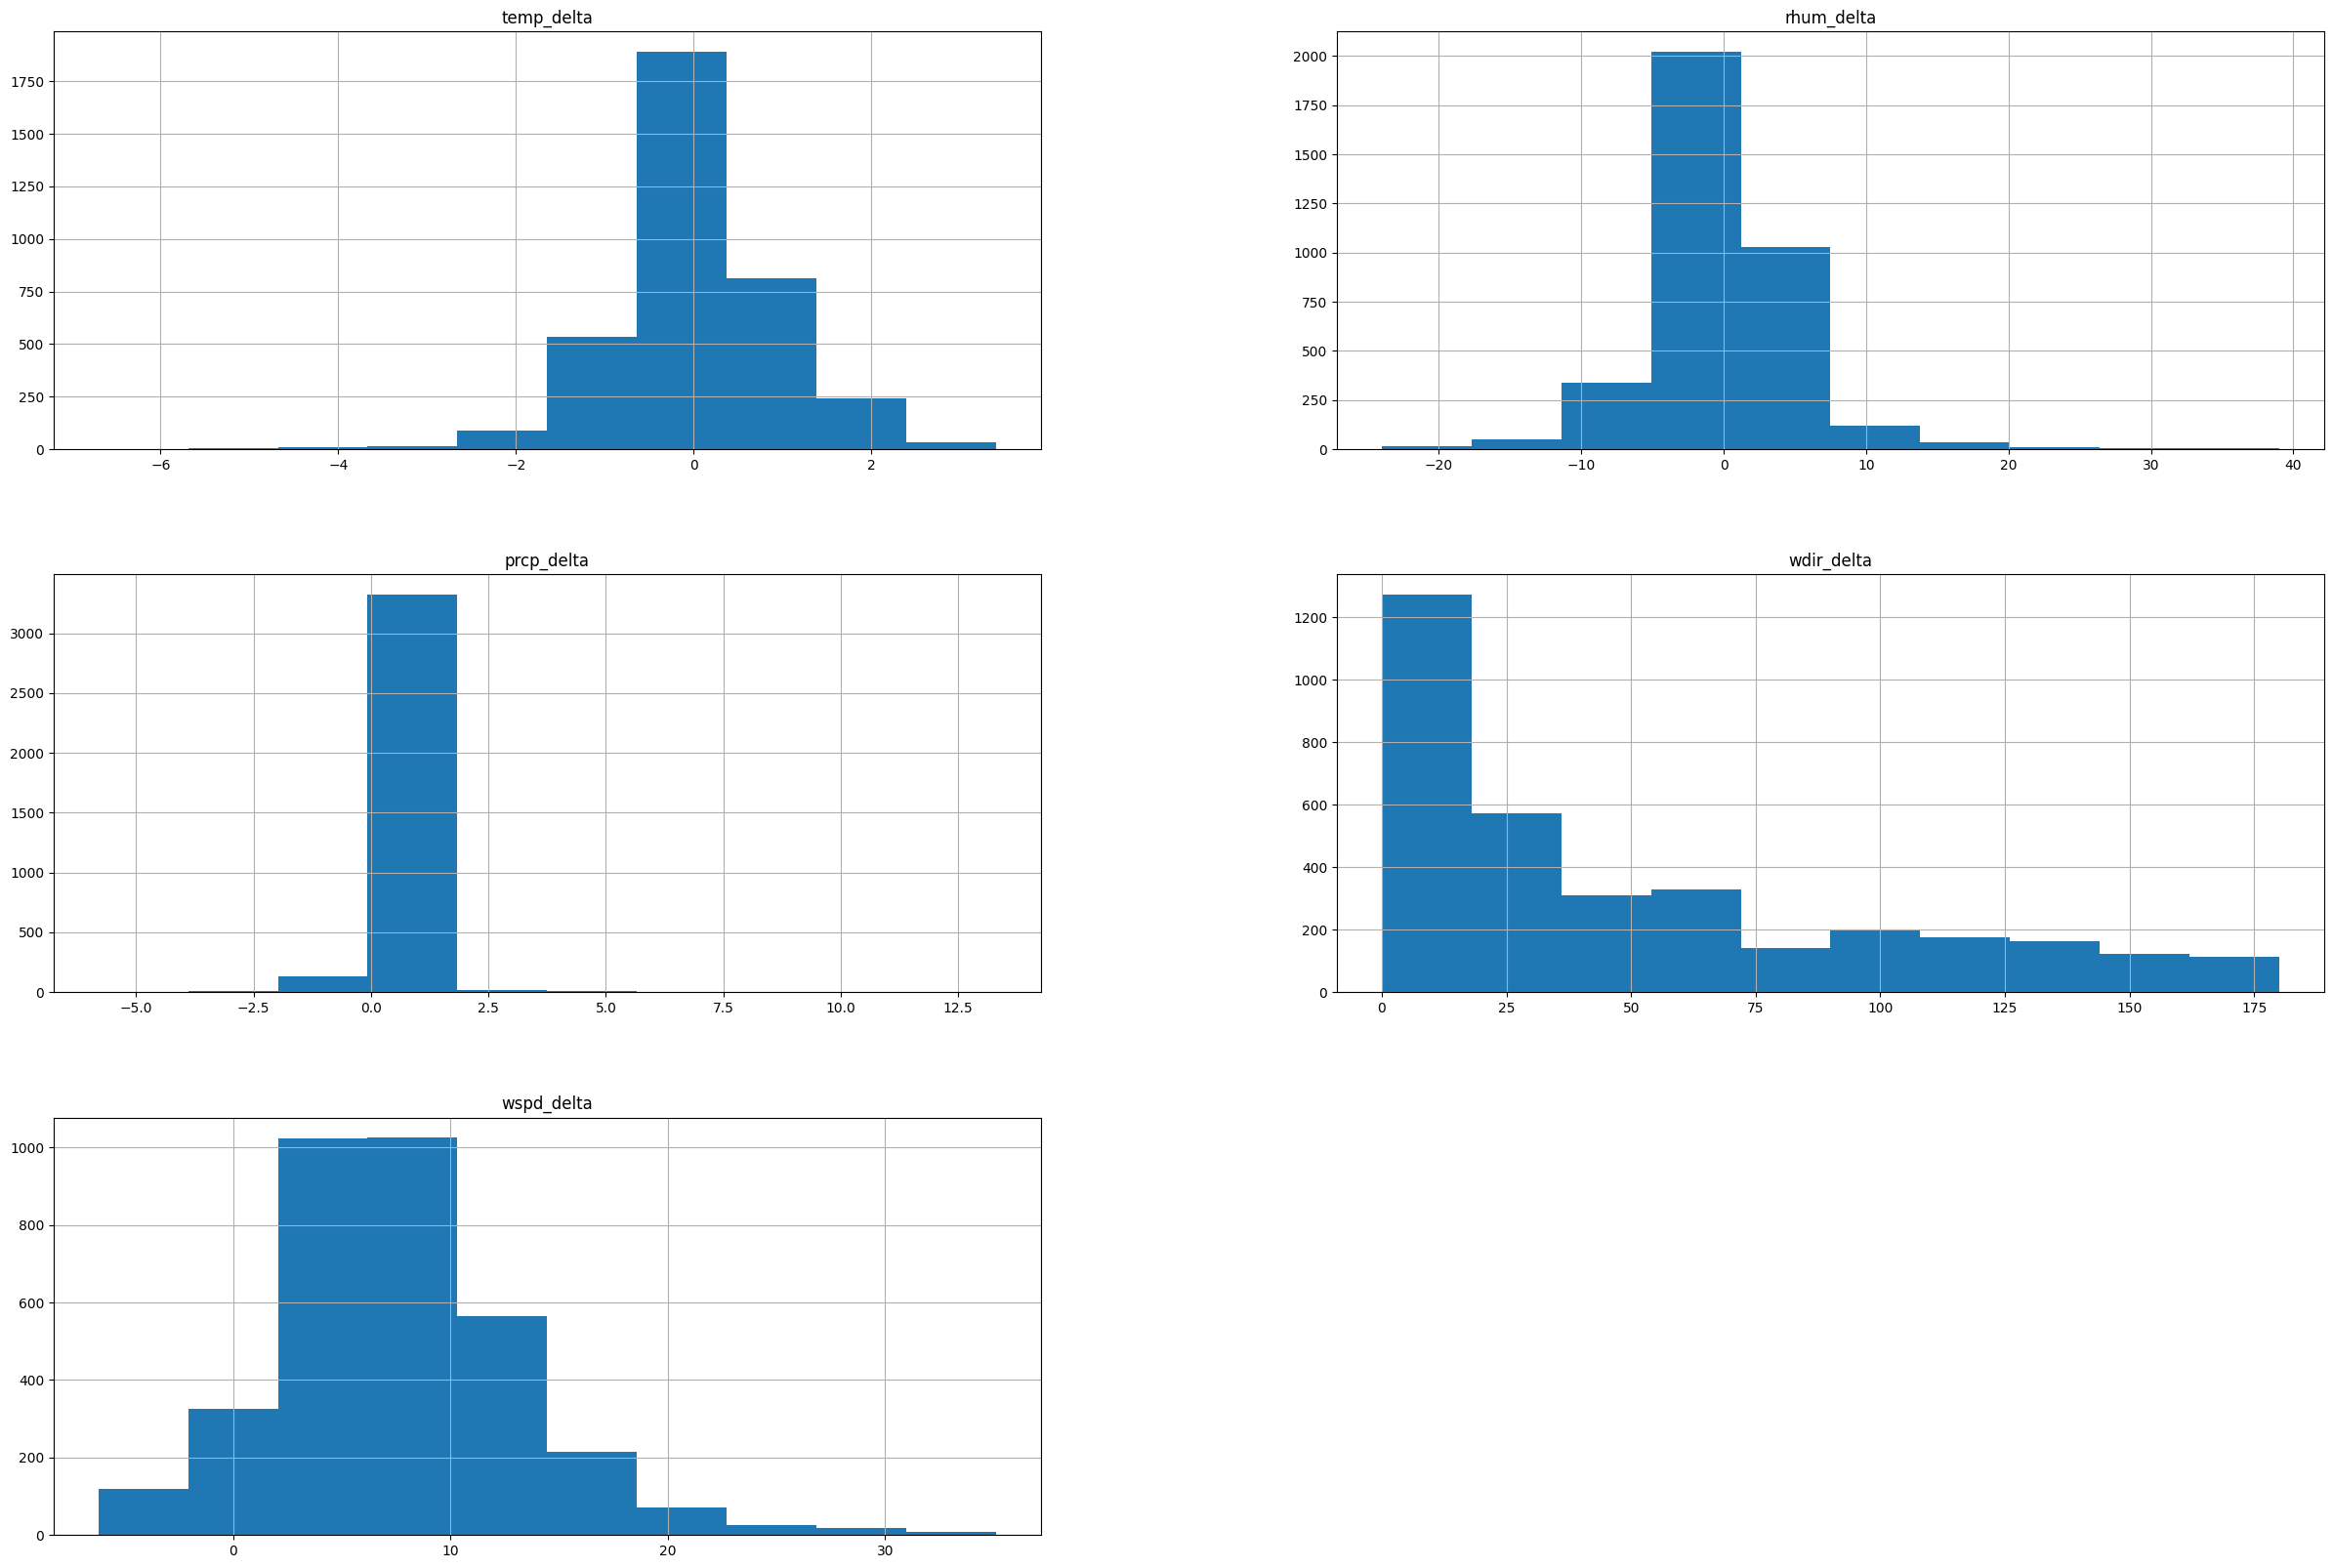

In [134]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].hist(figsize=(30, 20))